In [9]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time
import matplotlib.pyplot as plt
import os
import pickle
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.special import comb

# Process clusters without normalization

In [10]:
features_folder = "C:\\Users\\t-anmend\\Documents\\UrbanSound8K\\audio"

In [11]:
with open(os.path.join(features_folder,'fold_1_stats_features.txt'),'rb') as f:
    features1 = pickle.load(f)

In [12]:
with open(os.path.join(features_folder,'fold_2_stats_features.txt'),'rb') as f:
    features2 = pickle.load(f)

In [13]:
with open(os.path.join(features_folder,'fold_3_stats_features.txt'),'rb') as f:
    features3 = pickle.load(f)

In [14]:
with open(os.path.join(features_folder,'fold_4_stats_features.txt'),'rb') as f:
    features4 = pickle.load(f)

In [15]:
with open(os.path.join(features_folder,'fold_5_stats_features.txt'),'rb') as f:
    features5 = pickle.load(f)

In [16]:
with open(os.path.join(features_folder,'fold_6_stats_features.txt'),'rb') as f:
    features6 = pickle.load(f)

In [17]:
with open(os.path.join(features_folder,'fold_7_stats_features.txt'),'rb') as f:
    features7 = pickle.load(f)

In [18]:
with open(os.path.join(features_folder,'fold_8_stats_features.txt'),'rb') as f:
    features8 = pickle.load(f)

In [19]:
with open(os.path.join(features_folder,'fold_9_stats_features.txt'),'rb') as f:
    features9 = pickle.load(f)

In [20]:
with open(os.path.join(features_folder,'fold_10_stats_features.txt'),'rb') as f:
    features10 = pickle.load(f)

In [21]:
all_features = np.concatenate((features1,features2,features3,features4,features5,features6,features7,features8,features9,features10))

In [22]:
all_features.shape

(8275, 3)

In [23]:
all_features[0][0].shape

(896,)

In [39]:
features_stats = np.zeros((all_features.shape[0],all_features[0][0].shape[0]))

In [40]:
features_stats.shape

(8275, 896)

In [41]:
for i in range(all_features.shape[0]):
    features_stats[i] = all_features[i][0]

In [42]:
features_stats.shape

(8275, 896)

In [43]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.55714286e+02,  3.18571429e+01,  1.54714286e+02, ...,
         2.04124145e+00, -3.23146466e-01,  0.00000000e+00],
       [ 1.53714286e+02,  2.88571429e+01,  1.52285714e+02, ...,
         2.03824199e+00,  8.31110930e-02,  0.00000000e+00],
       [ 1.55142857e+02,  2.97142857e+01,  1.57714286e+02, ...,
         1.78252864e+00, -1.01275608e-01,  0.00000000e+00]])

In [21]:
all_features[0][1]

3

In [160]:
labels = []

for i in range(all_features.shape[0]):
    labels.append(all_features[i][1])

In [161]:
len(labels)

8275

In [24]:
n_samples, n_features = features_stats.shape
n_labels = len(np.unique(labels))

sample_size = 300

In [25]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.55714286e+02,  3.18571429e+01,  1.54714286e+02, ...,
         2.04124145e+00, -3.23146466e-01,  0.00000000e+00],
       [ 1.53714286e+02,  2.88571429e+01,  1.52285714e+02, ...,
         2.03824199e+00,  8.31110930e-02,  0.00000000e+00],
       [ 1.55142857e+02,  2.97142857e+01,  1.57714286e+02, ...,
         1.78252864e+00, -1.01275608e-01,  0.00000000e+00]])

In [26]:
print("n_labels: %d, \t n_samples %d, \t n_features %d"
      % (n_labels, n_samples, n_features))

n_labels: 10, 	 n_samples 8275, 	 n_features 896


In [162]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [28]:
print(82 * '_')
print('init\t\ttime\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

for i in range(8,21):    
    bench_k_means(KMeans(init='k-means++', n_clusters=i, n_init=10),
                  name=f"k-means++ {i}", data=features_stats)

    bench_k_means(KMeans(init='random', n_clusters=i, n_init=10),
                  name=f"random {i}", data=features_stats)

    # in this case the seeding of the centers is deterministic, hence we run the
    # kmeans algorithm only once with n_init=1
    pca = PCA(n_components=i).fit(features_stats)
    bench_k_means(KMeans(init=pca.components_, n_clusters=i, n_init=1),
                  name=f"PCA-based {i}",
                  data=features_stats)
print(82 * '_')

__________________________________________________________________________________
init		time	inertia		homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 8	14.54s	12422682356	0.421	0.467	0.443	0.300	0.442	0.093
random 8 	16.07s	12423450391	0.420	0.465	0.441	0.299	0.440	0.101
PCA-based 8	1.94s	12436530631	0.449	0.524	0.483	0.329	0.482	0.126
k-means++ 9	13.69s	12109670744	0.458	0.489	0.473	0.319	0.472	0.103
random 9 	14.38s	12121648731	0.457	0.482	0.469	0.331	0.468	0.115
PCA-based 9	1.70s	12149131996	0.465	0.509	0.486	0.314	0.485	0.096
k-means++ 10	18.36s	11806519117	0.477	0.492	0.485	0.315	0.484	0.122
random 10	17.79s	11806525584	0.477	0.492	0.485	0.315	0.484	0.107
PCA-based 10	2.11s	11881505653	0.494	0.496	0.495	0.362	0.494	0.104
k-means++ 11	16.87s	11595310650	0.480	0.479	0.480	0.303	0.478	0.104
random 11	17.54s	11595661168	0.487	0.481	0.484	0.320	0.483	0.100
PCA-based 11	1.86s	11773371357	0.466	0.466	0.466	0.303	0.465	0.102
k-means++ 12	17.73s	11389182566	0.504	0.479	0.491	0.327	0.490	0.

In [163]:
n_labels

10

In [164]:
pca = PCA(n_components=n_labels).fit(features_stats)

In [165]:
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [166]:
estimator_PCA = KMeans(init=pca.components_, n_clusters=n_labels, n_init=1)

In [167]:
estimator_PCA

KMeans(algorithm='auto', copy_x=True,
       init=array([[-1.12053484e-02, -3.89293483e-03, -4.24254045e-02, ...,
         4.73023136e-04,  3.79887710e-04,  6.66629268e-05],
       [-7.43202622e-03, -2.76945519e-03, -2.28668264e-02, ...,
        -3.54211042e-04, -4.76298932e-04,  3.87106126e-05],
       [-1.26310883e-03, -1.30357546e-02, -1.09669066e-02, ...,
        -5.48335135e-04, -3.53765995e-05,  1.25279978e-05],
       ....
         3.21014677e-04, -3.04938514e-04, -4.29613102e-05],
       [ 4.88131254e-03,  1.08138716e-02,  1.09989655e-02, ...,
        -6.80730358e-05, -3.68067169e-04, -1.00921294e-04],
       [ 3.06626956e-03,  7.28612840e-03,  9.67466609e-03, ...,
        -1.08985031e-04,  9.97099316e-05,  1.76819659e-05]]),
       max_iter=300, n_clusters=10, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [168]:
estimator_PCA.fit_predict(features_stats)

array([3, 3, 5, ..., 0, 0, 0])

In [169]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [170]:
cluster_matrix_pca = metrics.cluster.contingency_matrix(labels,estimator_PCA.fit_predict(features_stats))

In [171]:
cluster_matrix_pca

array([[195,   0,  25,   0,  95, 155, 479,  46,   0,   5],
       [  7,  21, 185,   0,   4,   6,  44,  22,   2,   5],
       [  0,   0,  55,  11,   2, 138,  39, 755,   0,   0],
       [  2,   5,  38, 429,   0, 324,  39,  27,   1,   0],
       [610,   3, 154,   0,  81,  35,   8,  19,   5,  29],
       [ 73,   5,  10,   0, 483,   7, 144,  16,   7, 251],
       [  0,   0,  19,   0,   0,   3,   7,   0, 252,   0],
       [159,   0,  20,   0,  38,  19, 161,   0,   1, 580],
       [  1, 608,  56,   1,   7,  52, 140,  50,   0,   0],
       [  3,  13, 677,   0,   2,  14,  25, 266,   0,   0]])

In [172]:
estimator = KMeans(init='k-means++', n_clusters=10, n_init=10)

In [173]:
estimator.fit_predict(features_stats)

array([6, 6, 6, ..., 4, 4, 4])

In [176]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.55714286e+02,  3.18571429e+01,  1.54714286e+02, ...,
         2.04124145e+00, -3.23146466e-01,  0.00000000e+00],
       [ 1.53714286e+02,  2.88571429e+01,  1.52285714e+02, ...,
         2.03824199e+00,  8.31110930e-02,  0.00000000e+00],
       [ 1.55142857e+02,  2.97142857e+01,  1.57714286e+02, ...,
         1.78252864e+00, -1.01275608e-01,  0.00000000e+00]])

In [174]:
cluster_matrix = metrics.cluster.contingency_matrix(labels,estimator.fit_predict(features_stats))

In [175]:
cluster_matrix

array([[ 51,   4,   4, 422,   0, 411, 104,   4,   0,   0],
       [ 33,   3,   1,  17,  22,  30, 189,   0,   0,   1],
       [747,   0,   0,   2,   0,  94, 141,   0,  16,   0],
       [ 30,   0,   1,   2,   4, 167, 159,   0, 502,   0],
       [ 19,  37, 464, 192,   3,   4, 208,  14,   0,   3],
       [ 17, 284,   0, 262,   5, 119,  11, 290,   1,   7],
       [  0,   0,   0,   0,   0,  11,  29,   0,   0, 241],
       [  0, 577,  38, 280,   0,  25,  45,  12,   0,   1],
       [ 62,   0,   0,  41, 624, 118,  68,   1,   1,   0],
       [314,   0,   0,  15,  14,  28, 629,   0,   0,   0]])

## Calculate Precision, Recall and F-measure

In [47]:
comb(5, 2, exact=True) + comb(4, 2, exact=True) + comb(3, 2, exact=True) + comb(2, 2, exact=True)

20

In [48]:
comb(6, 2, exact=True) + comb(6, 2, exact=True) + comb(5, 2, exact=True)

40

In [49]:
comb(8, 2, exact=True)

28

In [110]:
def get_true_positives(matrix):

    TP = 0
    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[0]):
            TP = TP + comb(matrix[j][i], 2, exact=True)
            
    return TP

In [177]:
get_true_positives(cluster_matrix_pca)

1663957

In [178]:
get_true_positives(cluster_matrix)

1606352

In [54]:
TP

1604934

In [55]:
np.sum(cluster_matrix, axis=0)

array([ 520, 1588,  331, 1009,  253,  905,  506, 1268,  672, 1223])

In [113]:
def get_false_positives(matrix):

    TP_FP = 0
    sum_array = np.sum(matrix, axis=0)
    for i in range(sum_array.shape[0]):
        TP_FP = TP_FP + comb(sum_array[i], 2, exact=True)
        
    TP = 0
    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[0]):
            TP = TP + comb(matrix[j][i], 2, exact=True)
        
    return TP_FP - TP
    
    

In [57]:
TP_FP

4302859

In [58]:
FP = TP_FP - TP

In [179]:
get_false_positives(cluster_matrix_pca)

2224706

In [180]:
get_false_positives(cluster_matrix)

2702950

In [59]:
FP

2697925

In [104]:
FN

2186760

In [85]:
cluster_matrix_ = np.array([[5, 1, 2], [1, 4, 0], [0, 1, 3]])

In [86]:
cluster_matrix_.shape

(3, 3)

In [87]:
cluster_matrix_

array([[5, 1, 2],
       [1, 4, 0],
       [0, 1, 3]])

In [116]:
def get_false_negatives(matrix):    
    FN = 0

    labels = matrix.shape[0]

    clusters = matrix.shape[1]

    for label in range(labels):
        for cluster_ in range(clusters):
            for cluster in range(cluster_ + 1,clusters):

                FN = FN + matrix[label][cluster_] * matrix[label][cluster]
                
    return FN

In [117]:
FN

2186760

In [181]:
get_false_negatives(cluster_matrix_pca)

2127737

In [182]:
get_false_negatives(cluster_matrix)

2185342

In [120]:
def get_true_negatives(matrix):    
    TN = 0

    labels = matrix.shape[0]

    clusters = matrix.shape[1]

    for label in range(labels):
        row = 0
        for cluster_ in range(clusters - 1):
            for cluster in range(cluster_ + 1,clusters):
                if label != row:
                    TN = TN + matrix[label][cluster_] * matrix[row][cluster]
            row = row + 1
                    
                
    return TN

In [ ]:
TN = 0

In [121]:
def get_precision(tp, fp):

    return tp / (tp + fp)

In [122]:
def get_recall(tp, fn):
    
    return tp / (tp + fn)

In [123]:
def get_f_measure(precision, recall):
    
    return 2 * precision * recall / (precision + recall)

In [125]:
tp = get_true_positives

In [ ]:
fp

In [183]:
precision_pca = get_precision(get_true_positives(cluster_matrix_pca), get_false_positives(cluster_matrix_pca))

In [186]:
precision_pca

0.4278995119916537

In [185]:
recall_pca = get_recall(get_true_positives(cluster_matrix_pca), get_false_negatives(cluster_matrix_pca))

In [187]:
recall_pca

0.4388426386728465

In [188]:
f_measure_pca = get_f_measure(precision_pca, recall_pca)

In [189]:
f_measure_pca

0.4333019936443059

In [190]:
precision = get_precision(get_true_positives(cluster_matrix), get_false_positives(cluster_matrix))

In [191]:
precision

0.3727638489945703

In [192]:
recall = get_recall(get_true_positives(cluster_matrix), get_false_negatives(cluster_matrix))

In [193]:
recall

0.423650220719288

In [194]:
f_measure = get_f_measure(precision, recall)

In [195]:
f_measure

0.39658135863787614

# Process normalized features clusters (divide by max)

In [203]:
features_folder = "C:\\Users\\t-anmend\\Documents\\UrbanSound8K\\audio"

In [204]:
with open(os.path.join(features_folder,'fold_1_stats_features.txt'),'rb') as f:
    features = pickle.load(f)

In [415]:
features_stats.shape

(8275, 896)

In [430]:
features_normalized = np.zeros(features_stats.shape)

In [431]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.55714286e+02,  3.18571429e+01,  1.54714286e+02, ...,
         2.04124145e+00, -3.23146466e-01,  0.00000000e+00],
       [ 1.53714286e+02,  2.88571429e+01,  1.52285714e+02, ...,
         2.03824199e+00,  8.31110930e-02,  0.00000000e+00],
       [ 1.55142857e+02,  2.97142857e+01,  1.57714286e+02, ...,
         1.78252864e+00, -1.01275608e-01,  0.00000000e+00]])

In [432]:
features_normalized.shape

(8275, 896)

In [439]:
labels = []

for i in range(len(features)):
    labels.append(features[i][1])

In [434]:
features_normalized[:,:-1] = features_stats[:,:-1] / np.amax(features_stats, axis=0)[:-1]

In [435]:
features_normalized

array([[ 0.70051086,  0.16103896,  0.64022663, ..., -0.4398924 ,
         0.03925491,  0.        ],
       [ 0.72094508,  0.26233766,  0.65835694, ..., -1.        ,
         0.01558318,  0.        ],
       [ 0.68837803,  0.10649351,  0.62889518, ..., -0.12156301,
        -0.30954761,  0.        ],
       ...,
       [ 0.69604087,  0.57922078,  0.61359773, ...,  1.        ,
        -0.15830879,  0.        ],
       [ 0.68710089,  0.52467532,  0.60396601, ...,  0.99853057,
         0.04071595,  0.        ],
       [ 0.69348659,  0.54025974,  0.62549575, ...,  0.87325712,
        -0.04961471,  0.        ]])

In [436]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.55714286e+02,  3.18571429e+01,  1.54714286e+02, ...,
         2.04124145e+00, -3.23146466e-01,  0.00000000e+00],
       [ 1.53714286e+02,  2.88571429e+01,  1.52285714e+02, ...,
         2.03824199e+00,  8.31110930e-02,  0.00000000e+00],
       [ 1.55142857e+02,  2.97142857e+01,  1.57714286e+02, ...,
         1.78252864e+00, -1.01275608e-01,  0.00000000e+00]])

In [437]:
np.amax(features_stats, axis=0)

array([223.71428571,  55.        , 252.14285714, 193.        ,
       255.        , 189.14285714, 211.71428571, 255.        ,
       255.        , 255.        , 255.        , 235.85714286,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       234.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 246.71428571, 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.        ,
       255.        , 255.        , 255.        , 255.  

In [443]:
len(labels)

8275

In [444]:
n_samples, n_features = features_stats.shape
n_labels = len(np.unique(labels))

sample_size = 300

In [445]:
print("n_labels: %d, \t n_samples %d, \t n_features %d"
      % (n_labels, n_samples, n_features))

n_labels: 10, 	 n_samples 8275, 	 n_features 896


In [44]:
features_normalize = deepcopy(features_stats)

In [45]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.55714286e+02,  3.18571429e+01,  1.54714286e+02, ...,
         2.04124145e+00, -3.23146466e-01,  0.00000000e+00],
       [ 1.53714286e+02,  2.88571429e+01,  1.52285714e+02, ...,
         2.03824199e+00,  8.31110930e-02,  0.00000000e+00],
       [ 1.55142857e+02,  2.97142857e+01,  1.57714286e+02, ...,
         1.78252864e+00, -1.01275608e-01,  0.00000000e+00]])

In [46]:
features_normalize[:,:-1] = features_stats[:,:-1] / np.amax(features_stats, axis=0)[:-1]

In [47]:
features_normalize

array([[ 0.70051086,  0.16103896,  0.64022663, ..., -0.4398924 ,
         0.03925491,  0.        ],
       [ 0.72094508,  0.26233766,  0.65835694, ..., -1.        ,
         0.01558318,  0.        ],
       [ 0.68837803,  0.10649351,  0.62889518, ..., -0.12156301,
        -0.30954761,  0.        ],
       ...,
       [ 0.69604087,  0.57922078,  0.61359773, ...,  1.        ,
        -0.15830879,  0.        ],
       [ 0.68710089,  0.52467532,  0.60396601, ...,  0.99853057,
         0.04071595,  0.        ],
       [ 0.69348659,  0.54025974,  0.62549575, ...,  0.87325712,
        -0.04961471,  0.        ]])

In [48]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.55714286e+02,  3.18571429e+01,  1.54714286e+02, ...,
         2.04124145e+00, -3.23146466e-01,  0.00000000e+00],
       [ 1.53714286e+02,  2.88571429e+01,  1.52285714e+02, ...,
         2.03824199e+00,  8.31110930e-02,  0.00000000e+00],
       [ 1.55142857e+02,  2.97142857e+01,  1.57714286e+02, ...,
         1.78252864e+00, -1.01275608e-01,  0.00000000e+00]])

In [38]:
from copy import deepcopy

In [54]:
a = np.array([1, 2, 3, 4])

In [55]:
b = a

In [56]:
b = a[1:3]

In [57]:
a

array([1, 2, 3, 4])

In [58]:
b

array([2, 3])

In [51]:
b[1] = 42

In [52]:
b

array([ 2, 42])

In [53]:
a

array([ 1,  2, 42,  4])

In [55]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [446]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
bench_k_means(KMeans(init='k-means++', n_clusters=n_labels, n_init=10),
              name="k-means++", data=features_normalized)

bench_k_means(KMeans(init='random', n_clusters=n_labels, n_init=10),
              name="random", data=features_normalized)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_labels).fit(features_normalized)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_labels, n_init=1),
              name="PCA-based",
              data=features_normalized)
print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	16.91s	620129	0.434	0.441	0.437	0.307	0.436	0.027
random   	17.07s	620454	0.431	0.436	0.433	0.292	0.432	0.041
PCA-based	1.70s	619909	0.447	0.452	0.449	0.308	0.448	0.047
__________________________________________________________________________________


In [447]:
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [448]:
estimator_PCA = KMeans(init=pca.components_, n_clusters=n_labels, n_init=1)

In [449]:
estimator_PCA.fit_predict(features_normalized)

array([4, 4, 4, ..., 7, 7, 7])

In [450]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [451]:
cluster_matrix = metrics.cluster.contingency_matrix(labels,estimator_PCA.fit_predict(features_normalized))

In [452]:
cluster_matrix

array([[  0, 304,   0,   4,   0,   0, 487, 117,  46,  42],
       [ 60,   5,  14,   1,   0,   0,  22,   8,  19, 167],
       [  5,   1,   0,   0,  17,   0,  87,   0, 744, 146],
       [117,   2,   2,   0, 425,   0, 147,   3,  33, 136],
       [ 73, 133,   3,  18,   0,   4,   6, 554,  18, 135],
       [ 12, 259,   3, 283,   0, 260, 118,  20,  14,  27],
       [171,   0,   0,   0,   0,   0,  21,   0,   0,  89],
       [ 87, 167,   0, 489,   0,   2,  39, 169,   0,  25],
       [ 10,  22, 611,   0,   1,   0, 119,  13,  63,  76],
       [  0,   6,  12,   0,   0,   0,  28,  10, 273, 671]])

In [453]:
estimator = KMeans(init='k-means++', n_clusters=n_labels, n_init=10)

In [454]:
estimator.fit_predict(features_normalized)

array([5, 5, 5, ..., 3, 3, 3])

In [455]:
cluster_matrix = metrics.cluster.contingency_matrix(labels,estimator.fit_predict(features_normalized))

In [456]:
cluster_matrix

array([[456,   0,  49,  88,   0,   0, 295,   3, 109,   0],
       [ 23,   0,  23,   7,  60,  13,   4,   1, 165,   0],
       [ 84,   0, 752,   0,   5,   0,   1,   0, 142,  16],
       [132,   0,  32,   2, 116,   2,   2,   0, 161, 418],
       [  5,   3,  20, 513,  70,   3, 138,  23, 169,   0],
       [134, 251,  14,   8,  12,   2, 283, 263,  29,   0],
       [ 13,   0,   0,   0, 170,   0,   0,   0,  98,   0],
       [ 51,   1,   0, 124,  88,   0, 164, 508,  42,   0],
       [136,   0,  63,   2,  10, 603,  22,   0,  78,   1],
       [ 29,   0, 305,   3,   0,  11,   6,   0, 646,   0]])

In [457]:
features_normalized

array([[ 0.70051086,  0.16103896,  0.64022663, ..., -0.4398924 ,
         0.03925491,  0.        ],
       [ 0.72094508,  0.26233766,  0.65835694, ..., -1.        ,
         0.01558318,  0.        ],
       [ 0.68837803,  0.10649351,  0.62889518, ..., -0.12156301,
        -0.30954761,  0.        ],
       ...,
       [ 0.69604087,  0.57922078,  0.61359773, ...,  1.        ,
        -0.15830879,  0.        ],
       [ 0.68710089,  0.52467532,  0.60396601, ...,  0.99853057,
         0.04071595,  0.        ],
       [ 0.69348659,  0.54025974,  0.62549575, ...,  0.87325712,
        -0.04961471,  0.        ]])

# Process normalized features clusters (zero mean and unit variance)

In [203]:
features_folder = "C:\\Users\\t-anmend\\Documents\\UrbanSound8K\\audio"

In [204]:
with open(os.path.join(features_folder,'fold_1_stats_features.txt'),'rb') as f:
    features = pickle.load(f)

In [205]:
features_stats.shape

(829, 896)

In [277]:
scaler = StandardScaler()

scaler.fit(features_stats)
features_scaled = scaler.transform(features_stats)

In [278]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.85142857e+02,  4.72857143e+01,  2.04714286e+02, ...,
         1.46198596e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.85000000e+02,  4.78571429e+01,  2.04142857e+02, ...,
         1.18820862e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.92857143e+02,  5.44285714e+01,  2.23428571e+02, ...,
         1.51216676e+00,  0.00000000e+00,  0.00000000e+00]])

In [279]:
features_scaled

array([[-0.25927855, -1.78873092,  0.20980419, ..., -1.0435269 ,
         0.07798136,  0.12938454],
       [ 0.16255788, -1.2710631 ,  0.352433  , ..., -2.30061048,
         0.02406282,  0.12938454],
       [-0.50974392, -2.06747514,  0.12066118, ..., -0.32908088,
        -0.71650749,  0.12938454],
       ...,
       [ 2.36401671,  1.78184971,  1.5603208 , ...,  1.55121534,
        -0.01143195,  0.12938454],
       [ 2.35083432,  1.83494385,  1.5424922 , ...,  1.25019503,
        -0.01143195,  0.12938454],
       [ 3.07586567,  2.44552641,  2.14420752, ...,  1.60638952,
        -0.01143195,  0.12938454]])

In [289]:
features_stats

array([[ 1.56714286e+02,  8.85714286e+00,  1.61428571e+02, ...,
        -8.97926598e-01,  8.01287436e-02,  0.00000000e+00],
       [ 1.61285714e+02,  1.44285714e+01,  1.66000000e+02, ...,
        -2.04124145e+00,  3.18090381e-02,  0.00000000e+00],
       [ 1.54000000e+02,  5.85714286e+00,  1.58571429e+02, ...,
        -2.48139462e-01, -6.31861415e-01,  0.00000000e+00],
       ...,
       [ 1.85142857e+02,  4.72857143e+01,  2.04714286e+02, ...,
         1.46198596e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.85000000e+02,  4.78571429e+01,  2.04142857e+02, ...,
         1.18820862e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.92857143e+02,  5.44285714e+01,  2.23428571e+02, ...,
         1.51216676e+00,  0.00000000e+00,  0.00000000e+00]])

In [172]:
labels = []

for i in range(len(features)):
    labels.append(features[i][1])

In [173]:
len(labels)

829

In [174]:
n_samples, n_features = features_stats.shape
n_labels = len(np.unique(labels))

sample_size = 300

In [175]:
print("n_labels: %d, \t n_samples %d, \t n_features %d"
      % (n_labels, n_samples, n_features))

n_labels: 10, 	 n_samples 829, 	 n_features 896


In [55]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [281]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
bench_k_means(KMeans(init='k-means++', n_clusters=n_labels, n_init=10),
              name="k-means++", data=features_scaled)

bench_k_means(KMeans(init='random', n_clusters=n_labels, n_init=10),
              name="random", data=features_scaled)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_labels).fit(features_scaled)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_labels, n_init=1),
              name="PCA-based",
              data=features_scaled)
print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.91s	519395	0.586	0.603	0.595	0.453	0.585	0.101
random   	1.01s	520171	0.598	0.631	0.614	0.457	0.605	0.101
PCA-based	0.12s	518814	0.612	0.619	0.616	0.465	0.606	0.105
__________________________________________________________________________________


In [282]:
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [283]:
estimator_PCA = KMeans(init=pca.components_, n_clusters=n_labels, n_init=1)

In [284]:
estimator_PCA.fit_predict(features_scaled)

array([7, 7, 7, 1, 5, 5, 6, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 0,
       7, 5, 5, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 3, 3, 0,
       5, 5, 5, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 5, 1, 0, 0, 0, 1, 0, 1, 5, 8, 9, 8, 8, 8, 8, 8, 8, 8, 0, 0, 8,
       9, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 8, 8, 2, 2, 2, 2, 2, 2, 2,

In [285]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [397]:
cluster_matrix = metrics.cluster.contingency_matrix(labels,estimator_PCA.fit_predict(features_scaled))

ValueError: row, column, and data array must all be the same length

In [287]:
cluster_matrix

array([[ 0,  0,  0,  0,  0, 25, 24, 48,  0,  3],
       [ 0,  3,  7,  0,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35, 65,  0,  0,  0],
       [ 0,  3,  0, 40,  0, 28,  4,  0, 10,  1],
       [ 0,  8,  0,  0,  0, 13,  0,  4,  0, 67],
       [ 9,  0,  0,  0, 14,  1,  0, 72,  0,  0],
       [ 0, 21,  0,  0,  0, 12,  0,  0,  0,  0],
       [87,  6,  0,  0,  0,  3,  0, 10,  0, 13],
       [ 0,  0, 60,  0,  0, 17,  5,  4,  0,  0],
       [ 0,  0,  6,  0,  0, 90,  1,  1,  0,  2]])

In [398]:
estimator = KMeans(init='k-means++', n_clusters=n_labels, n_init=10)

In [399]:
estimator.fit_predict(features_scaled)

array([7, 7, 7, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 1, 1, 1,
       1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 2,
       7, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1,
       1, 1, 1, 3, 7, 6, 6, 6, 6, 6, 6, 1, 6, 1, 1, 6, 1, 1, 6, 2, 2, 4,
       1, 1, 1, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       1, 1, 0, 9, 9, 9, 0, 9, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 6, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5,

In [400]:
cluster_matrix = metrics.cluster.contingency_matrix(labels,estimator.fit_predict(features_normalized))

ValueError: row, column, and data array must all be the same length

In [287]:
cluster_matrix

array([[ 0,  0,  0,  0,  0, 25, 24, 48,  0,  3],
       [ 0,  3,  7,  0,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35, 65,  0,  0,  0],
       [ 0,  3,  0, 40,  0, 28,  4,  0, 10,  1],
       [ 0,  8,  0,  0,  0, 13,  0,  4,  0, 67],
       [ 9,  0,  0,  0, 14,  1,  0, 72,  0,  0],
       [ 0, 21,  0,  0,  0, 12,  0,  0,  0,  0],
       [87,  6,  0,  0,  0,  3,  0, 10,  0, 13],
       [ 0,  0, 60,  0,  0, 17,  5,  4,  0,  0],
       [ 0,  0,  6,  0,  0, 90,  1,  1,  0,  2]])

# Visualize data TSNE

In [295]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [347]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=40).fit_transform(features_stats)
X_embedded.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8275 samples in 1.061s...
[t-SNE] Computed neighbors for 8275 samples in 312.492s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8275
[t-SNE] Computed conditional probabilities for sample 2000 / 8275
[t-SNE] Computed conditional probabilities for sample 3000 / 8275
[t-SNE] Computed conditional probabilities for sample 4000 / 8275
[t-SNE] Computed conditional probabilities for sample 5000 / 8275
[t-SNE] Computed conditional probabilities for sample 6000 / 8275
[t-SNE] Computed conditional probabilities for sample 7000 / 8275
[t-SNE] Computed conditional probabilities for sample 8000 / 8275
[t-SNE] Computed conditional probabilities for sample 8275 / 8275
[t-SNE] Mean sigma: 324.950922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.788330
[t-SNE] KL divergence after 1000 iterations: 1.196042


(8275, 2)

In [348]:
data = pd.DataFrame(X_embedded)

In [349]:
data.columns = ['X','Y']

In [350]:
data['labels'] = labels

In [351]:
data

,X,Y,labels
0,-20.174519,-64.286385,3
1,-10.491163,-72.497429,3
2,-20.915998,-63.797619,3
3,3.561133,-74.639664,3
4,-54.595856,-54.033104,6
5,-15.996443,-45.418327,3
6,-16.891205,-38.101978,3
7,-16.681204,-38.558987,3
8,-16.673481,-38.583046,3
9,67.071724,-4.859401,7


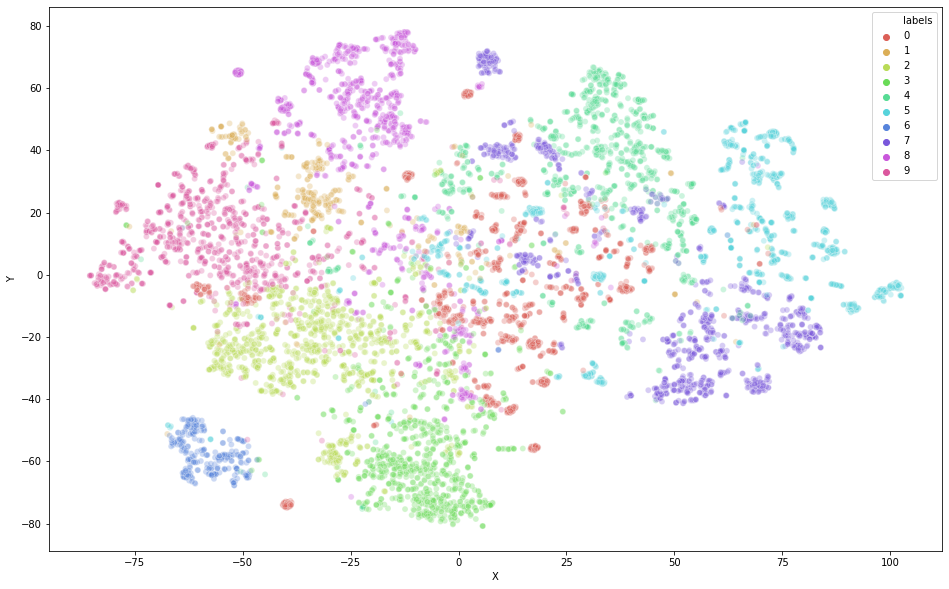

In [352]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='X', y='Y',
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=data,
    legend="full",
    alpha=0.3
)

In [372]:
pca = PCA(n_components=100)

In [373]:
pca100 = pca.fit_transform(features_stats)

In [375]:
pca100.shape

(8275, 100)

In [376]:
print('Cumulative explained variation for 100 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 100 principal components: 0.9235963776924163


In [378]:
X_embedded_pca = TSNE(n_components=2, verbose=1, perplexity=40).fit_transform(pca100)
X_embedded_pca.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8275 samples in 0.072s...
[t-SNE] Computed neighbors for 8275 samples in 14.001s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8275
[t-SNE] Computed conditional probabilities for sample 2000 / 8275
[t-SNE] Computed conditional probabilities for sample 3000 / 8275
[t-SNE] Computed conditional probabilities for sample 4000 / 8275
[t-SNE] Computed conditional probabilities for sample 5000 / 8275
[t-SNE] Computed conditional probabilities for sample 6000 / 8275
[t-SNE] Computed conditional probabilities for sample 7000 / 8275
[t-SNE] Computed conditional probabilities for sample 8000 / 8275
[t-SNE] Computed conditional probabilities for sample 8275 / 8275
[t-SNE] Mean sigma: 243.615780
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.774925
[t-SNE] KL divergence after 1000 iterations: 1.193892


(8275, 2)

In [379]:
data_pca = pd.DataFrame(X_embedded_pca)

In [380]:
data_pca.columns = ['X','Y']

In [381]:
data_pca['labels'] = labels

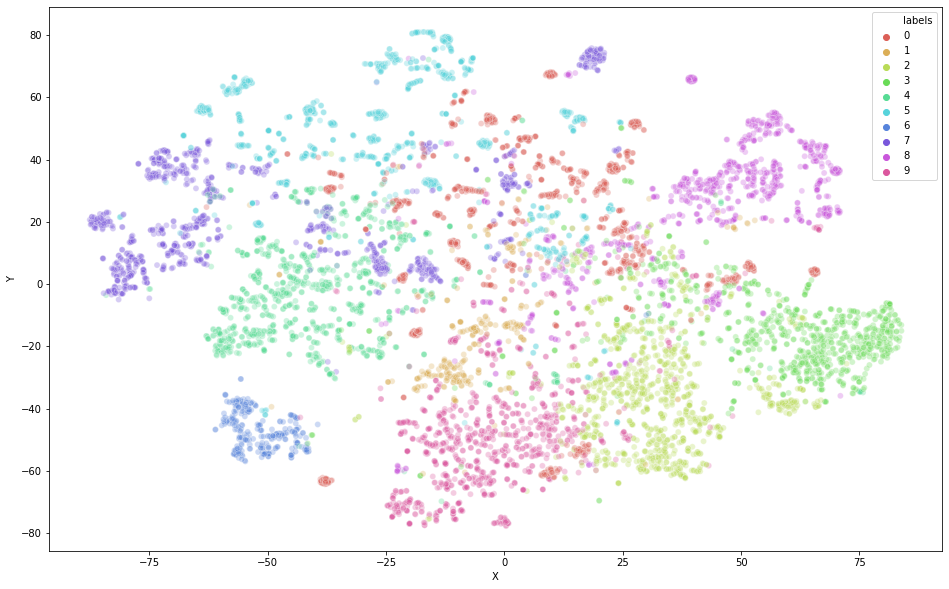

In [382]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='X', y='Y',
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=data_pca,
    legend="full",
    alpha=0.3
)

In [383]:
n_samples_tsne, n_features_tsne = X_embedded.shape
n_labels = len(np.unique(labels))

sample_size = 300

In [384]:
print("n_labels: %d, \t n_samples %d, \t n_features %d"
      % (n_labels, n_samples_tsne, n_features_tsne))

n_labels: 10, 	 n_samples 8275, 	 n_features 2


In [385]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [389]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=None)))
    
bench_k_means(KMeans(init='k-means++', n_clusters=n_labels, n_init=10),
              name="k-means++", data=X_embedded)

bench_k_means(KMeans(init='random', n_clusters=n_labels, n_init=10),
              name="random", data=X_embedded)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
#pca = PCA(n_components=n_labels).fit(X_embedded)
#bench_k_means(KMeans(init=pca.components_, n_clusters=n_labels, n_init=1),
              #name="PCA-based",
              #data=X_embedded)
print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.39s	2593954	0.532	0.524	0.528	0.440	0.527	0.404
random   	0.43s	2596745	0.532	0.523	0.527	0.436	0.526	0.397
__________________________________________________________________________________


In [282]:
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [390]:
estimator = KMeans(init='k-means++', n_clusters=n_labels, n_init=10)

In [391]:
estimator.fit_predict(X_embedded)

array([4, 4, 4, ..., 9, 9, 9])

In [392]:
labels

[3,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 3,
 0,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 4,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 9,
 9,
 3,


In [393]:
cluster_matrix = metrics.cluster.contingency_matrix(labels,estimator.fit_predict(X_embedded))

In [394]:
cluster_matrix

array([[138, 489,  34,  31,   4,  29,  97,  26,  97,  55],
       [  5,  42,   1, 113,   0,   4,   1, 120,   6,   4],
       [  9,  66,   4,  28,   1, 760, 132,   0,   0,   0],
       [  6,  87,   4,   7,   0,  30, 721,   4,   6,   0],
       [559,  34,   2,   9,   8,  14,   9,  12,  92, 205],
       [ 40, 160,   7,   1, 286,  15,   1,   1,  77, 408],
       [  0,   3, 276,   0,   0,   0,   2,   0,   0,   0],
       [206,  94,   0,   0, 214,   0,   0,   0, 406,  58],
       [  9, 149,   0,  16,   0,  25,  41, 672,   1,   2],
       [  8,  32,   1, 779,   0, 130,   8,  40,   0,   2]])